In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df=pd.read_csv("heigh-weight.csv")

In [ ]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [ ]:
df.columns

Index(['Weight ', 'Height'], dtype='object')

Text(0, 0.5, 'height')

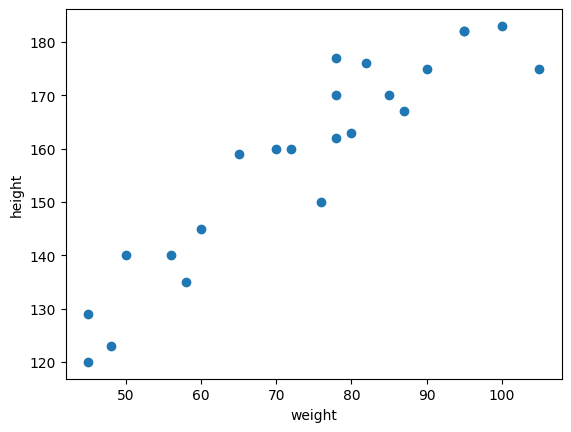

In [ ]:
##Scatter plot
plt.scatter(df['Weight '],df["Height"])
plt.xlabel("weight")
plt.ylabel("height")

In [ ]:
## correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


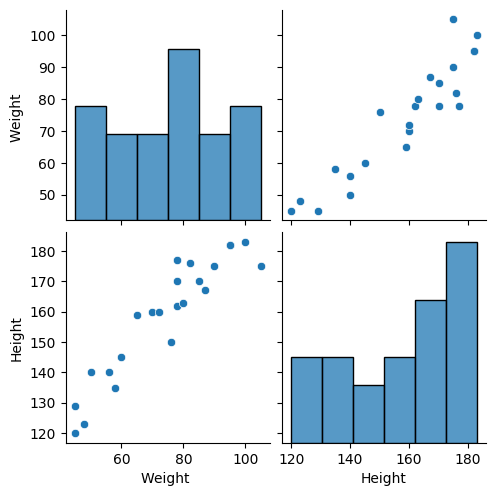

In [ ]:
##seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [ ]:
##independent and dependent features()
x=df[["Weight "]] ##independent features should be dataframe or 2 dimensional array
y=df['Height']# dependent features can be in series or 1D array

In [ ]:
##Train Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
x_train.shape

(17, 1)

In [ ]:
##standardization
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [ ]:
x_test=scaler.transform(x_test)

In [ ]:
x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [ ]:
##Apply simple linear regression
from sklearn.linear_model import LinearRegression


In [ ]:
regression=LinearRegression(n_jobs=-1)

In [ ]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
print("coefficient or slope;",regression.coef_)
print("coefficient or slope;",regression.intercept_)

coefficient or slope; [17.2982057]
coefficient or slope; 156.47058823529412


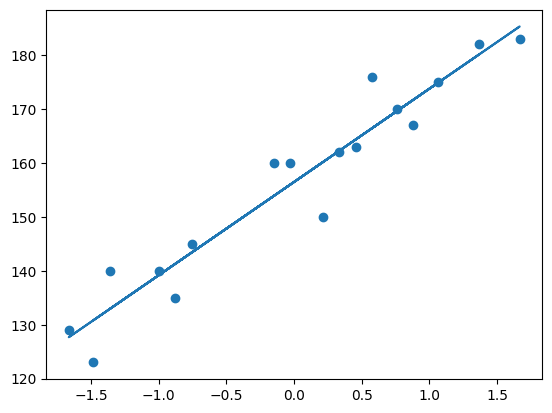

In [ ]:
##Plot Training data bestfit line
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

In [ ]:
#prediction for test data
y_pred=regression.predict(x_test)

In [ ]:
# performance metric
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [ ]:
##R Square
from sklearn.metrics import r2_score

In [ ]:
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [ ]:
#adjusted rsquared
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[-1]-1)

0.6701033397476595

In [ ]:
##OLS linear regression
import statsmodels.api as sm

In [ ]:
model=sm.OLS(y_train,x_train).fit()

In [ ]:
prediction=model.predict(x_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 19 Dec 2024   Prob (F-statistic):                       0.664
Time:                        06:55:19   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
##prediction for new data
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])